# Game of 24

In [57]:
import re
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def get_files_in_folder(folder_path):
    files = []
    for file in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file)):
            files.append(folder_path + "/" +file)
    return files

def get_number(string):
    numbers = re.findall(r'\d+', string)
    numbers = list(map(int, numbers))
    return numbers[0] 
    
def get_params(file_path):
    data = {}

    file_name = file_path.split('/')[-1]
    params = file_name.split('_')

    data["set"] = params[0].split("-")[0]
    data["n_agents"] = get_number(params[1])
    data["n_steps"] = get_number(params[2])
    data["k"] = get_number(params[3])
    data["origin_value"] = get_number(params[4])
    data["backtrack"] = float("0." + str(get_number(params[5].split(".")[1])))
    data["resampling"] = params[6].split("-")[0]

    with open(file_path, 'r') as file:
        results = json.load(file)

    data["cost"] = results.pop("Cost")
    success = 0
    for experiment in results.values():
        if {"r":1} in experiment["Verifications"]:
            success +=1
    success_rate  = success/len(results)

    data["success_rate"] = success_rate

    return data

In [58]:
# Accuracy and Cost from ToT benchmarks
tot_runs = get_files_in_folder("benchmarks/gameof24")
accuracies = []
costs = []

for run_file in tot_runs:
    with open(run_file, 'r') as file:
        run = json.load(file)

    # Compute cost
    cost = run[-1]["usage_so_far"]["cost"]
    costs.append(cost)

    # Compute accuracy
    success = 0
    for puzzle in run:
        if {"r":1} in puzzle["infos"]:
            success +=1
    accuracy = success/len(run)
    accuracies.append(accuracy)

tot_cost = sum(costs)/len(costs)
tot_accuracy = sum(accuracies)/len(accuracies)

print(f"Costs :      {[round(cost,2) for cost in costs]}\t->\tMean: {tot_cost:.3f}")
print(f"Accuracies : {[round(accuracy,2) for accuracy in accuracies]}\t->\tMean: {tot_accuracy:.3f}")

Costs :      [1.76, 1.6, 1.77, 1.73, 1.7]	->	Mean: 1.711
Accuracies : [0.25, 0.0, 0.23, 0.2, 0.0]	->	Mean: 0.136


In [59]:
files = get_files_in_folder("logs/test/gameof24")

results = [get_params(file) for file in files]
results = sorted(results, key=lambda x: x["success_rate"], reverse=True)

df = pd.DataFrame(results)
df["total_cost"] = df["cost"].apply(lambda x: x["total_cost"])
df["name"] = df.apply(lambda x: f"{x['n_agents']}agents\n{x['n_steps']}steps\n{x['k']}k\n{x['backtrack']}b", axis=1)

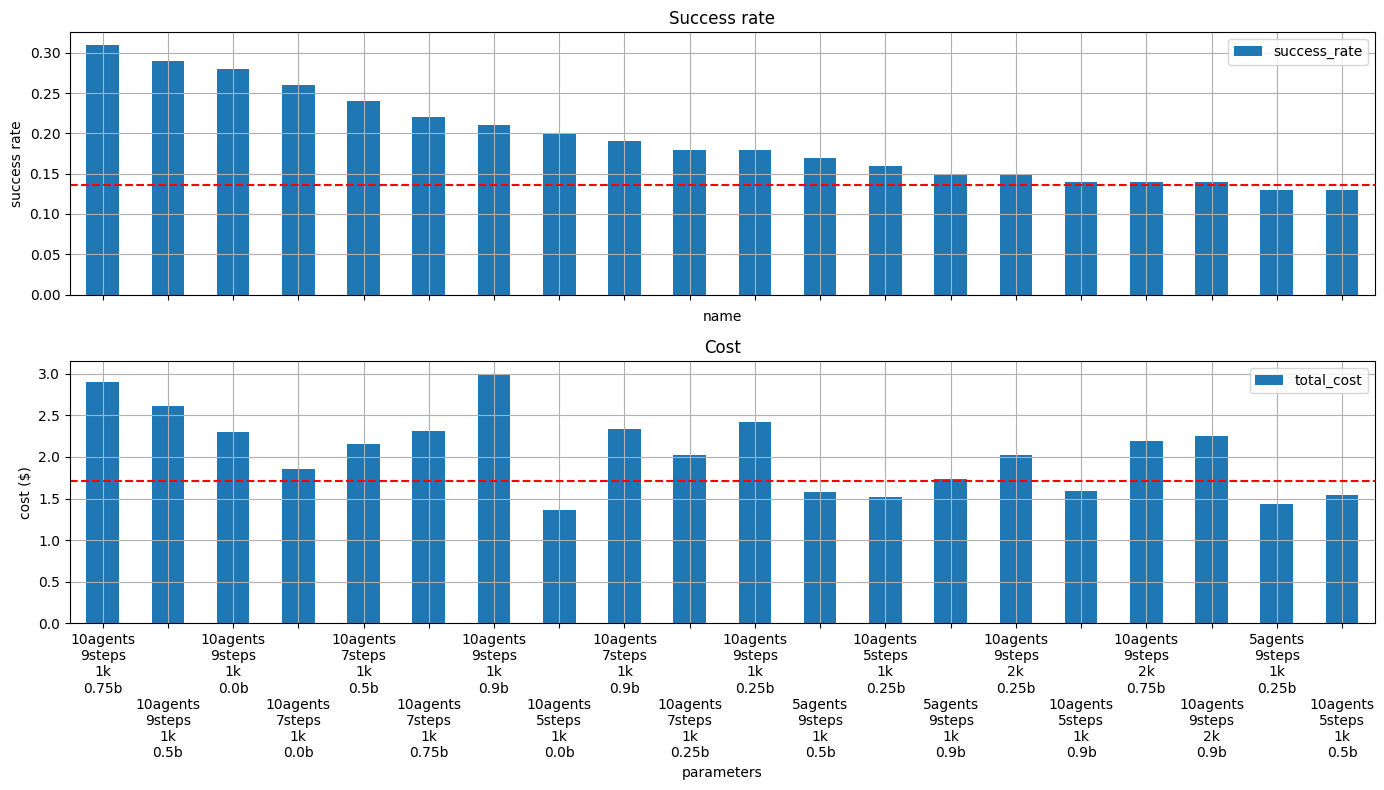

In [60]:
# prioritizing cost

import matplotlib.pyplot as plt

df_temp = df.copy()
df_temp.sort_values(by=["success_rate", "total_cost"], ascending=[False, True], inplace=True)
df_temp = df_temp.head(20)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Plot the first dataset on the first subplot
df_temp.plot(x="name", y="success_rate", kind="bar", title="Success Rate", ax=ax1)
ax1.axhline(y=tot_accuracy, color='r', linestyle='--')  # Adding a horizontal line
ax1.set_ylabel('success rate')
ax1.set_title('Success rate')
ax1.grid(True)
ax1.set_xticklabels([])  # Hide x-axis tick labels

# Plot the second dataset on the second subplot
df_temp.plot(x="name", y="total_cost", kind="bar", title="Cost", ax=ax2)
ax2.axhline(y=tot_cost, color='r', linestyle='--')  # Adding a horizontal line
ax2.set_xlabel('parameters')
ax2.set_ylabel('cost ($)')
ax2.set_title('Cost')

labels  = df_temp["name"].tolist()
labels = [label if i%2==0 else "\n\n\n\n"+label for i, label in enumerate(labels)]
ax2.set_xticklabels(labels, rotation=0) 
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


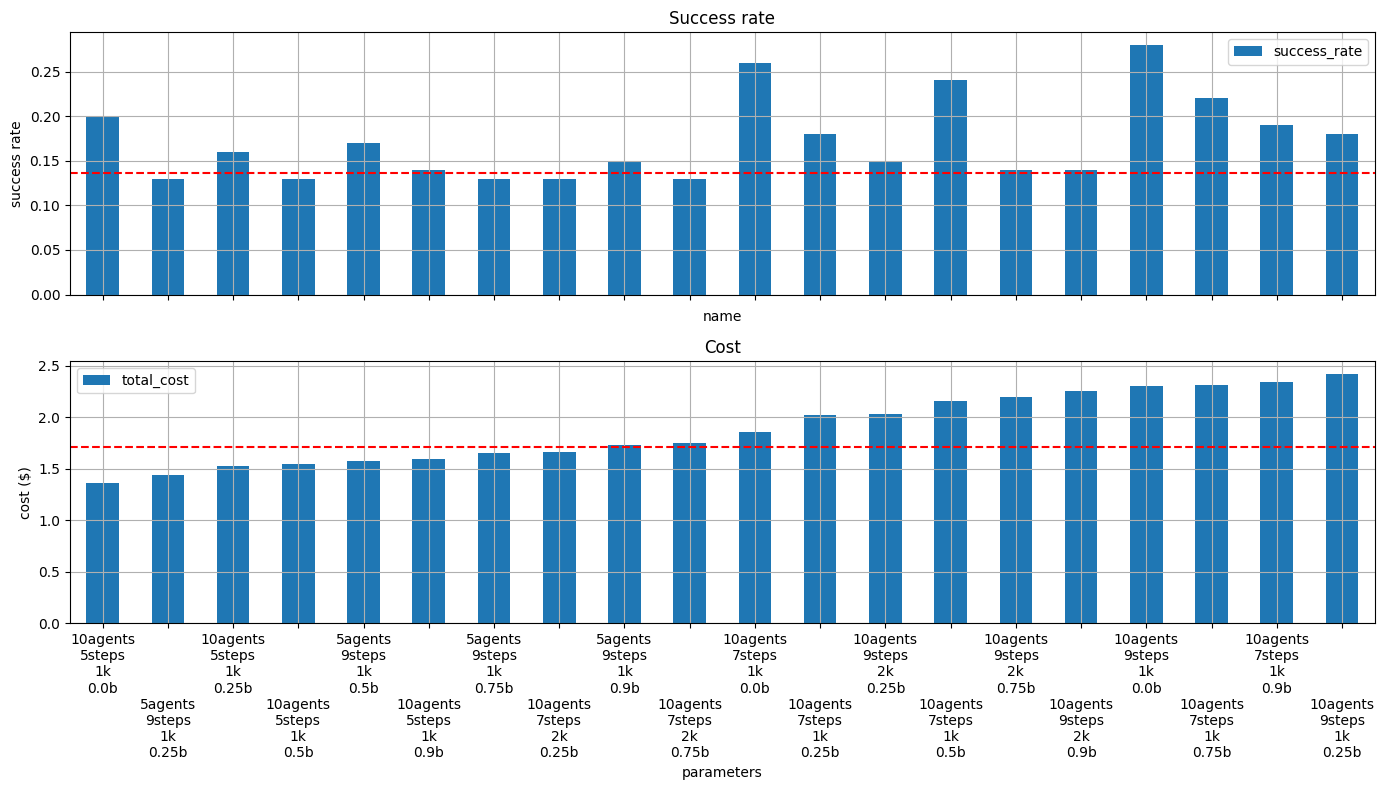

In [61]:
# prioritizing cost

import matplotlib.pyplot as plt

df_temp = df.copy()
df_temp = df_temp[df_temp.success_rate > 0.12]
df_temp.sort_values(by=["total_cost", "success_rate"], ascending=[True, False], inplace=True)
df_temp = df_temp.head(20)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Plot the first dataset on the first subplot
df_temp.plot(x="name", y="success_rate", kind="bar", title="Success Rate", ax=ax1)
ax1.axhline(y=tot_accuracy, color='r', linestyle='--')  # Adding a horizontal line
ax1.set_ylabel('success rate')
ax1.set_title('Success rate')
ax1.grid(True)
ax1.set_xticklabels([])  # Hide x-axis tick labels

# Plot the second dataset on the second subplot
df_temp.plot(x="name", y="total_cost", kind="bar", title="Cost", ax=ax2)
ax2.axhline(y=tot_cost, color='r', linestyle='--')  # Adding a horizontal line
ax2.set_xlabel('parameters')
ax2.set_ylabel('cost ($)')
ax2.set_title('Cost')
labels  = df_temp["name"].tolist()
labels = [label if i%2==0 else "\n\n\n\n"+label for i, label in enumerate(labels)]
ax2.set_xticklabels(labels, rotation=0) 
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
